In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (23.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and dir

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/foot_traffic/foot_traffic_23.04.10_23.07.02.csv')

<ipython-input-4-ee621c10cb1a>:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/foot_traffic/foot_traffic_23.04.10_23.07.02.csv')


In [ ]:
footTraffic = df.copy()
footTraffic.head()

,copy * foot_traffic_date.csv모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일
0,SDOT001,00000004030,2023-04-09_23:57:00,parks,Gangbuk-gu,Beon3-dong,2,2023-04-10 00:08:02
1,SDOT001,00000004036,2023-04-09_23:50:00,main_street,Yangcheon-gu,Sinjeong4-dong,9,2023-04-10 00:08:02
2,SDOT001,00000004029,2023-04-09_23:57:00,traditional_markets,Gangbuk-gu,Suyu3-dong,7,2023-04-10 00:08:02
3,SDOT001,00000004060,2023-04-09_23:51:00,parks,Seoul_Grand_Park,women_parking1,0,2023-04-10 00:08:02
4,SDOT001,00000004017,2023-04-09_23:50:00,main_street,Jung-gu,Buam-dong,11,2023-04-10 00:08:02


In [ ]:
columns = ['시리얼', '측정시간', '지역', '자치구', '방문자수']
footTraffic = df[columns]
footTraffic.head()

,시리얼,측정시간,지역,자치구,방문자수
0,00000004030,2023-04-09_23:57:00,parks,Gangbuk-gu,2
1,00000004036,2023-04-09_23:50:00,main_street,Yangcheon-gu,9
2,00000004029,2023-04-09_23:57:00,traditional_markets,Gangbuk-gu,7
3,00000004060,2023-04-09_23:51:00,parks,Seoul_Grand_Park,0
4,00000004017,2023-04-09_23:50:00,main_street,Jung-gu,11


In [ ]:
footTraffic = footTraffic.rename(columns={'측정시간': '측정날짜', '지역': '장소'})
footTraffic.head()

,시리얼,측정날짜,장소,자치구,방문자수
0,00000004030,2023-04-09_23:57:00,parks,Gangbuk-gu,2
1,00000004036,2023-04-09_23:50:00,main_street,Yangcheon-gu,9
2,00000004029,2023-04-09_23:57:00,traditional_markets,Gangbuk-gu,7
3,00000004060,2023-04-09_23:51:00,parks,Seoul_Grand_Park,0
4,00000004017,2023-04-09_23:50:00,main_street,Jung-gu,11


In [ ]:
#footTraffic['측정날짜'] = footTraffic['측정날짜'].astype(str).split('_')[0]
footTraffic['측정날짜'] = footTraffic['측정날짜'].astype(str).apply(lambda x: x[:-9])
footTraffic.head()

,시리얼,측정날짜,장소,자치구,방문자수
0,00000004030,2023-04-09,parks,Gangbuk-gu,2
1,00000004036,2023-04-09,main_street,Yangcheon-gu,9
2,00000004029,2023-04-09,traditional_markets,Gangbuk-gu,7
3,00000004060,2023-04-09,parks,Seoul_Grand_Park,0
4,00000004017,2023-04-09,main_street,Jung-gu,11


In [ ]:
footTraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555373 entries, 0 to 555372
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   시리얼     555372 non-null  object
 1   측정날짜    555373 non-null  object
 2   장소      555372 non-null  object
 3   자치구     555372 non-null  object
 4   방문자수    555372 non-null  object
dtypes: object(5)
memory usage: 21.2+ MB


In [ ]:
#footTraffic['방문자수'].apply(lambda x: int(x))
footTraffic['방문자수'] = footTraffic['방문자수'].apply(lambda x: int(x) if str(x).isdigit() else x)

In [ ]:
grouped_footTraffic = footTraffic.groupby(['측정날짜', '자치구', '장소'], as_index = False)['방문자수'].sum()

In [ ]:
grouped_footTraffic = grouped_footTraffic.drop(0)

In [ ]:
grouped_footTraffic.head(100)

,측정날짜,자치구,장소,방문자수
1,2023-04-09,Eunpyeong-gu,main_street,13
2,2023-04-09,Eunpyeong-gu,parks,2
3,2023-04-09,Gangbuk-gu,parks,2
4,2023-04-09,Gangbuk-gu,traditional_markets,7
5,2023-04-09,Gangdong-gu,commercial_area,8
...,...,...,...,...
96,2023-04-12,Seocho-gu,main_street,18191
97,2023-04-12,Seodaemun-gu,public_facilities,183
98,2023-04-12,Seodaemun-gu,traditional_markets,1999
99,2023-04-12,Seongdong-gu,main_street,1109


In [ ]:
# 자치구와 측정날짜를 기준으로 그룹화한 후 방문자수를 합산합니다.
grouped_data = grouped_footTraffic.groupby(['자치구', '측정날짜'])['방문자수'].sum().reset_index()

In [ ]:
grouped_data.head(15)

,자치구,측정날짜,방문자수
0,Dobong-gu,2023-06-09,13907
1,Dobong-gu,2023-06-10,106510
2,Dobong-gu,2023-06-11,100780
3,Dobong-gu,2023-06-12,111321
4,Dobong-gu,2023-06-13,106511
5,Dobong-gu,2023-06-14,107677
6,Dobong-gu,2023-06-15,107131
7,Dobong-gu,2023-06-16,108856
8,Dobong-gu,2023-06-17,107869
9,Dobong-gu,2023-06-18,110615


In [ ]:
#날짜 오름차순으로 정렬
sorted_data = grouped_data.sort_values(by='측정날짜')

In [ ]:
sorted_data.head(40)

,자치구,측정날짜,방문자수
521,Gwanak-gu,2023-04-09,20
388,Gangseo-gu,2023-04-09,29
48,Eunpyeong-gu,2023-04-09,15
1334,Songpa-gu,2023-04-09,8
1079,Seodaemun-gu,2023-04-09,2
994,Seocho-gu,2023-04-09,93
885,Mapo-gu,2023-04-09,11
1164,Seongdong-gu,2023-04-09,12
1419,Yangcheon-gu,2023-04-09,9
606,Gwangjin-gu,2023-04-09,84


In [ ]:
#sorted_data.to_csv('/content/drive/MyDrive/SWING/HOMERUN/sorted_foot_traffic_23.04.10_23.07.02.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# # 날짜를 datetime 형식으로 변환
# sorted_data['측정날짜'] = pd.to_datetime(sorted_data['측정날짜'])

# # 데이터 시각화
# fig, ax = plt.subplots()

# for region in sorted_data['자치구'].unique():
#     region_data = sorted_data[sorted_data['자치구'] == region]
#     ax.plot(region_data['측정날짜'], region_data['방문자수'], label=region)

# # x축, y축 라벨 설정
# ax.set_xlabel('날짜')
# ax.set_ylabel('방문자수')

# # 범례 표시
# ax.legend()

# # 그래프 출력
# plt.show()

<ipython-input-21-420f7ad5de24>:24: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
<ipython-input-21-420f7ad5de24>:24: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-21-420f7ad5de24>:24: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
<ipython-input-21-420f7ad5de24>:24: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
<ipython-input-21-420f7ad5de24>:24: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
<ipython-input-21-420f7ad5de24>:24: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  plt.tight_layout()
<ipython-input-21-420f7ad5de24>:24: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
<ipython-input-21-420f7ad5de24>:24: UserWarning: Gly

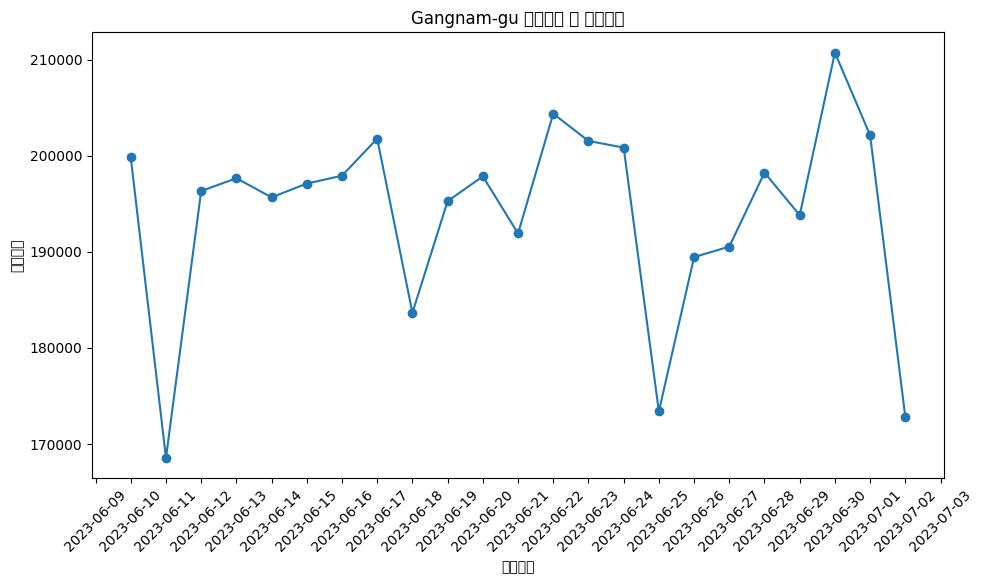

In [ ]:
# 측정날짜를 datetime 형식으로 변환
sorted_data['측정날짜'] = pd.to_datetime(sorted_data['측정날짜'])

# 필터링을 위한 날짜 범위 설정
start_date = pd.to_datetime('2023-06-10')
end_date = pd.to_datetime('2023-07-02')

# 필터링된 데이터 추출
filtered_df = sorted_data[(sorted_data['자치구'] == 'Gangnam-gu') & (sorted_data['측정날짜'] >= start_date) & (sorted_data['측정날짜'] <= end_date)]

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(filtered_df['측정날짜'], filtered_df['방문자수'], marker='o')
ax.set_xlabel('측정날짜')
ax.set_ylabel('방문자수')
ax.set_title('Gangnam-gu 방문자수 및 측정날짜')

# x축 눈금 설정
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
sorted_data['측정날짜'] = pd.to_datetime(sorted_data['측정날짜'])

# 날짜 범위 필터링
start_date = pd.to_datetime('2023-06-10')
end_date = pd.to_datetime('2023-07-02')
gangnam_filtered_df = sorted_data[(sorted_data['측정날짜'] >= start_date) & (sorted_data['측정날짜'] <= end_date) & (sorted_data['자치구'] == 'Gangnam-gu')]

# 필터링된 데이터 개수 출력
data_count = len(filtered_df)
print(f"Gangnam-gu 자치구의 데이터 개수: {data_count}")

print(gangnam_filtered_df)

Gangnam-gu 자치구의 데이터 개수: 23
            자치구       측정날짜      방문자수
365  Gangnam-gu 2023-06-10    199816
366  Gangnam-gu 2023-06-11    168562
367  Gangnam-gu 2023-06-12    196324
368  Gangnam-gu 2023-06-13    197651
369  Gangnam-gu 2023-06-14    195667
370  Gangnam-gu 2023-06-15    197099
371  Gangnam-gu 2023-06-16    197918
372  Gangnam-gu 2023-06-17    201770
373  Gangnam-gu 2023-06-18    183666
374  Gangnam-gu 2023-06-19    195271
375  Gangnam-gu 2023-06-20    197848
376  Gangnam-gu 2023-06-21    191906
377  Gangnam-gu 2023-06-22    204367
378  Gangnam-gu 2023-06-23    201532
379  Gangnam-gu 2023-06-24    200842
380  Gangnam-gu 2023-06-25    173392
381  Gangnam-gu 2023-06-26    189449
382  Gangnam-gu 2023-06-27    190542
383  Gangnam-gu 2023-06-28    198236
384  Gangnam-gu 2023-06-29    193811
385  Gangnam-gu 2023-06-30  210722.0
386  Gangnam-gu 2023-07-01  202121.0
387  Gangnam-gu 2023-07-02  172811.0


In [ ]:
# 필터링된 데이터 추출
filtered_date_df = sorted_data[(sorted_data['측정날짜'] >= start_date) & (sorted_data['측정날짜'] <= end_date)]

# 자치구별 방문자수 합산 및 개수로 나누어 평균 계산
result_df = filtered_date_df.groupby('자치구')['방문자수'].sum().reset_index()
result_df['평균방문자수'] = result_df['방문자수'] / data_count

# 내림차순으로 정렬
result_df = result_df.sort_values(by='평균방문자수', ascending=False)

# 결과 출력
print(result_df)

                 자치구       방문자수         평균방문자수
5         Gangnam-gu  4461323.0  193970.565217
1         Dongjak-gu  3789487.0  164760.304348
21      Yangcheon-gu  3122494.0  135760.608696
8            Guro-gu  3045746.0   132423.73913
0          Dobong-gu  2467133.0  107266.652174
7       Geumcheon-gu  2292118.0   99657.304348
4        Gangdong-gu  2284994.0   99347.565217
3         Gangbuk-gu  2156582.0   93764.434783
12           Jung-gu  2093029.0    91001.26087
10       Gwangjin-gu  1861756.0   80945.913043
9          Gwanak-gu  1824918.0    79344.26087
15          Nowon-gu  1689121.0   73440.043478
14           Mapo-gu  1480101.0   64352.217391
20         Songpa-gu  1423783.0   61903.608696
16         Seocho-gu  1377412.0   59887.478261
6         Gangseo-gu  1050889.0   45690.826087
13       Jungnang-gu   945572.0   41111.826087
11         Jongno-gu   656844.0   28558.434783
19  Seoul_Grand_Park   383304.0   16665.391304
17      Seodaemun-gu   150988.0    6564.695652
18      Seong

<ipython-input-24-1855218ca901>:24: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
<ipython-input-24-1855218ca901>:24: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-24-1855218ca901>:24: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
<ipython-input-24-1855218ca901>:24: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-1855218ca901>:24: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
<ipython-input-24-1855218ca901>:24: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  plt.tight_layout()
<ipython-input-24-1855218ca901>:24: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-1855218ca901>:24: UserWarning: Gly

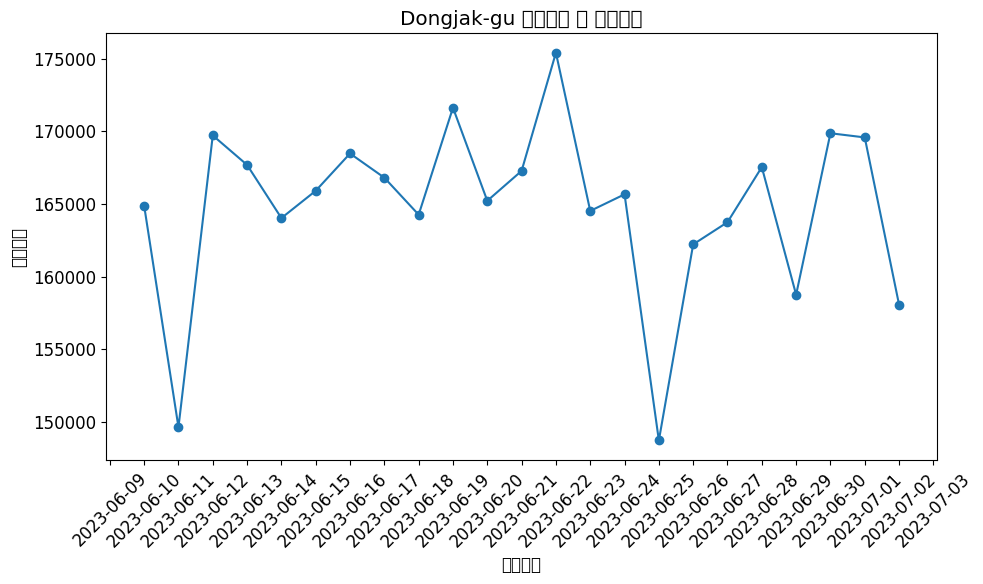

In [ ]:
# 측정날짜를 datetime 형식으로 변환
sorted_data['측정날짜'] = pd.to_datetime(sorted_data['측정날짜'])

# 필터링을 위한 날짜 범위 설정
start_date = pd.to_datetime('2023-06-10')
end_date = pd.to_datetime('2023-07-02')

# 필터링된 데이터 추출
filtered_df = sorted_data[(sorted_data['자치구'] == 'Dongjak-gu') & (sorted_data['측정날짜'] >= start_date) & (sorted_data['측정날짜'] <= end_date)]

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(filtered_df['측정날짜'], filtered_df['방문자수'], marker='o')
ax.set_xlabel('측정날짜')
ax.set_ylabel('방문자수')
ax.set_title('Dongjak-gu 방문자수 및 측정날짜')

# x축 눈금 설정
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})
plt.tight_layout()

# 그래프 출력
plt.show()